In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.options.display.max_columns = None

In [3]:
df=pd.read_csv("/Users/sudhi/Desktop/ Externship/feature_engineering.csv")   
df.head()

,forecast_discount_energy,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,contract_duration,activ_diff,end_diff,modif_diff,renewal_diff,channel_sales_epum,channel_sales_ewpa,channel_sales_fixd,channel_sales_foos,channel_sales_lmke,channel_sales_sddi,channel_sales_usil,origin_up_ewxe,origin_up_kamk,origin_up_ldks,origin_up_lxid,origin_up_usap,log_cons_12m,log_cons_gas_12m,log_cons_last_month,log_forecast_cons_12m,log_forecast_cons_year,log_forecast_meter_rent_12m,log_imp_cons,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3
0,0.0,0.095919,0.088347,58.995952,0,22.462276,21.460318,1,1732.36,180.000,0,47,37,-10,37,1,0,0,0,0,1,0,0,0,0,1,0,0,12.641989,0.000000,9.212937,10.185703,9.212937,5.886909,6.724794,0.103449,0.092115,0.067241,58.956502,36.356887,8.337051,59.059950,36.449002,8.404292,0.099169,0.089992,0.066557,59.055124,36.417705,8.350997,59.154293,36.507697,8.417554
1,0.0,0.114481,0.098142,40.606701,1,25.440000,25.440000,2,678.99,43.648,1,36,30,-5,2,6,0,0,0,1,0,0,0,0,0,0,1,0,0.000000,10.914124,0.000000,0.000000,0.000000,1.022451,0.000000,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687
2,0.0,0.145711,0.000000,44.311378,0,16.380000,16.380000,1,18.89,13.800,0,84,76,-7,76,4,0,0,0,0,0,0,0,0,1,0,0,0,8.446985,0.000000,0.000000,5.252012,0.000000,2.848971,0.000000,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000
3,0.0,0.165794,0.087899,44.311378,0,28.600000,28.600000,1,6.60,13.856,0,72,68,-3,68,8,0,0,0,1,0,0,0,0,1,0,0,0,6.300786,0.000000,0.000000,3.891004,0.000000,3.681855,0.000000,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,44.555962,0.088421,0.000000,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000
4,0.0,0.146694,0.000000,44.311378,0,30.220000,30.220000,1,25.46,13.200,0,72,69,-2,69,9,0,0,0,0,1,0,0,0,1,0,0,0,7.368340,0.000000,0.000000,5.484963,0.000000,3.036394,0.000000,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000


In [4]:
#split the data
y=df['churn']
X=df.drop('churn',axis=1)

In [5]:
y.value_counts()

0    14331
1     1528
Name: churn, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [7]:
#Applying 6 different base ML models

#Logistic Regression: basic linear classifier (good to baseline)
#Random Forest: ensemble bagging classifier
#K-Nearest Neighbors: instance based classifier
#Support Vector Machines: maximum margin classifier
#Gaussian Naive Bayes: probabilistic classifier
#XGBoost: ensemble (extreme!) boosting classifier

In [8]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB 
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [9]:
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:

    '''
    Lightweight script to test many models and find better model
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    models =[('LogReg', LogisticRegression(random_state=0)), 
        ('RF', RandomForestClassifier (random_state=0)),
        ('KNN', KNeighborsClassifier ()),
        ('SVM', SVC(random_state=0)), 
        ('GNB', GaussianNB()),
        ('XGB', XGBClassifier(eval_metric='mlogloss', random_state=0))]
         
    
    names = []
    scoring = ['accuracy']
    for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=0)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        print(name)
        print(model.score(X_test,y_test))
        

In [10]:
run_exps(X_train,y_train,X_test,y_test)

LogReg
0.9047919293820933
RF
0.9088902900378311
KNN
0.8978562421185372
SVM
0.9051071878940732
GNB
0.5154476670870114
XGB
0.9101513240857503


In [11]:
# XGB model performs better --- considering for model finetuning

In [13]:
from sklearn.model_selection import GridSearchCV


In [21]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

In [16]:
#Create model 

model =XGBClassifier(objective='binary:logistic',nthread=1,eval_metric='mlogloss', random_state=0 )

params={
    'min_child_weight':[i for i in np.arange(1,15,1)],
    'gamma':[i for i in np.arange(0,6,0.5)],
    'subsample':[i for i in np.arange(0,1.1,0.1)],
    'colsample_bytree':[i for i in np.arange(0,1.1,0.1)],
    'max_depth':[i for i in np.arange(1,15,1)],
    'scale_pos_weight':[i for i in np.arange(0,0.15,0.01)],
    'learning_rate':[i for i in np.arange(0,0.15,0.01)],
    'n_estimators':[i for i in np.arange(0,2000,100)],
}

randomized_search = RandomizedSearchCV(estimator=model, param_distributions=params, cv=5, scoring='accuracy')

random_result = randomized_search.fit(X_train,y_train)

print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

Best: 0.904548 using {'subsample': 0.4, 'scale_pos_weight': 0.08, 'n_estimators': 1100, 'min_child_weight': 3, 'max_depth': 14, 'learning_rate': 0.13, 'gamma': 0.0, 'colsample_bytree': 0.7000000000000001}


In [17]:
best_grid= random_result.best_params_

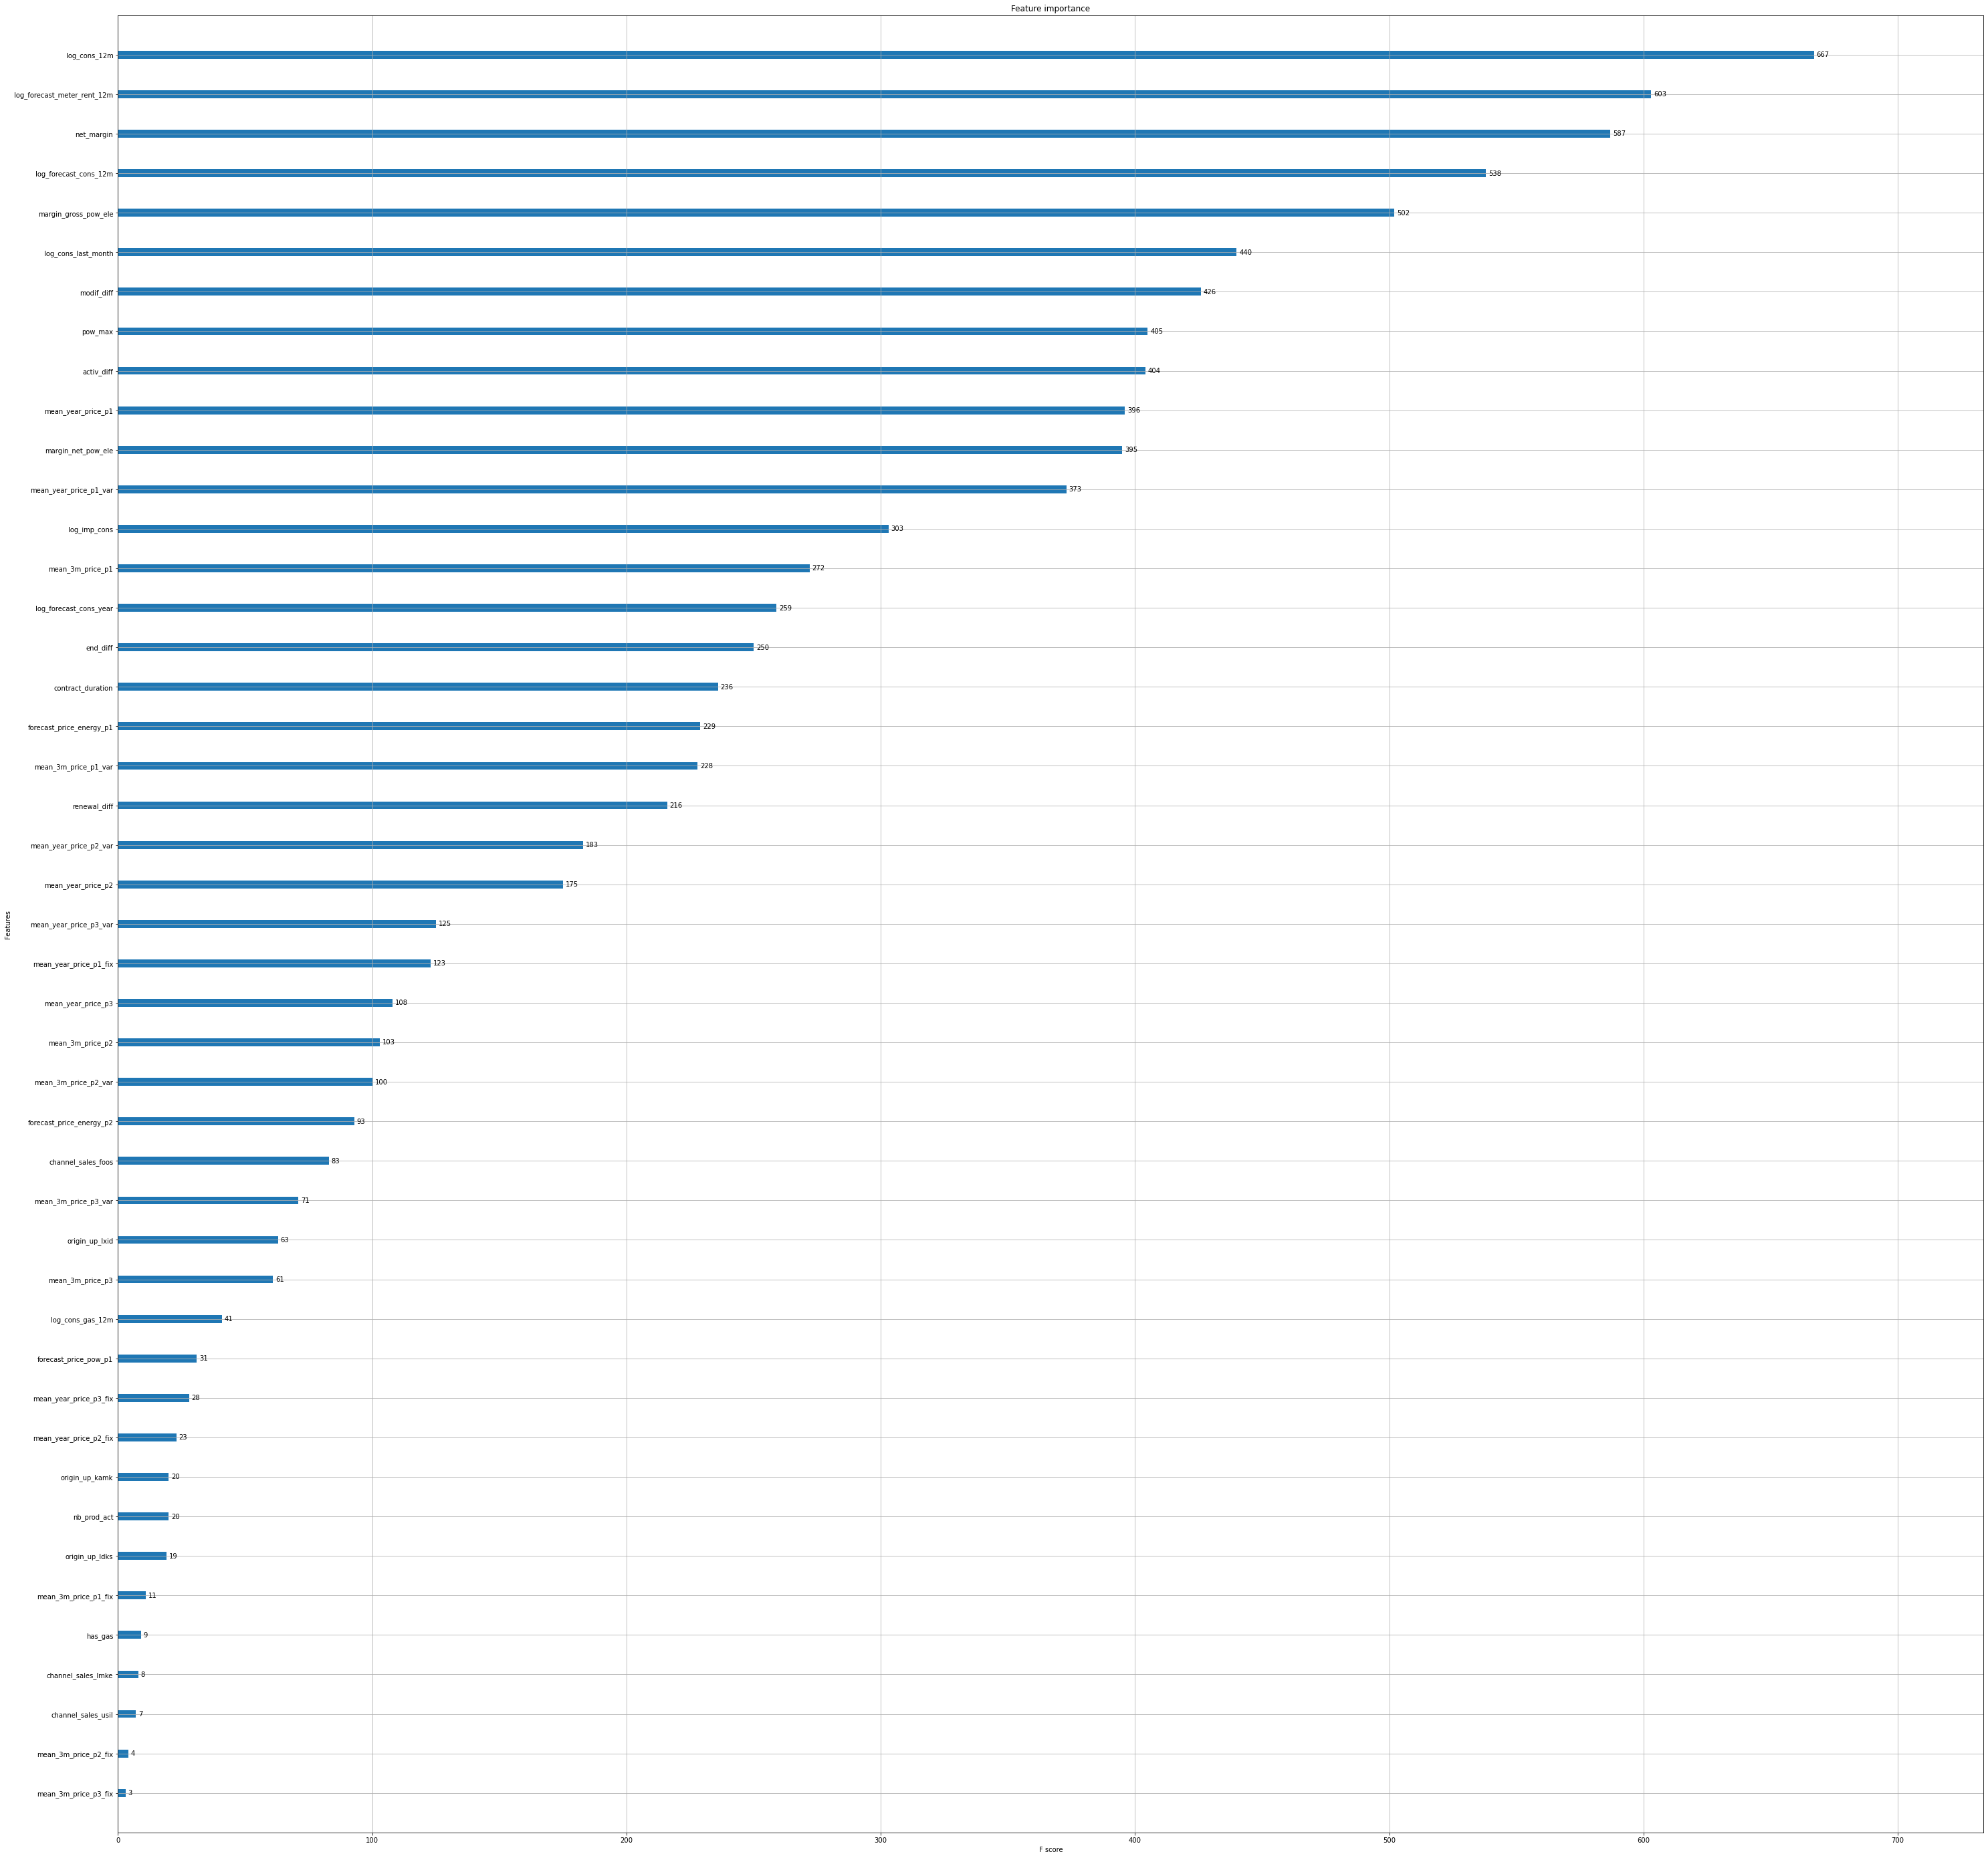

In [24]:
# feature importance

model_grid=XGBClassifier(objective='binary:logistic',
                            nthread=1,eval_metric='mlogloss',**best_grid)

model_grid.fit(X_train, y_train)

fig,ax=plt.subplots()
fig.set_size_inches(50, 50)
xgb.plot_importance(model_grid,ax=ax);